# Star spectrum

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import glob
import fitsio
from desitarget.targetmask import desi_mask
print ("imports complete")

imports complete


['/Users/abbymkaplan/desi/code/dc17a2/spectra-64/168', '/Users/abbymkaplan/desi/code/dc17a2/spectra-64/172']
/Users/abbymkaplan/desi/code/dc17a2/spectra-64/168/16879/spectra-64-16879.fits
[ 6.005073  8.992017  8.853892 ... 10.250333  9.854226  9.487929]
[3569.4 3570.4 3571.4 ... 5946.4 5947.4 5948.4]


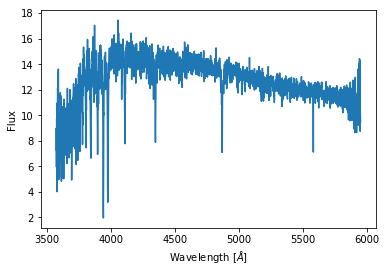

In [7]:
# this is a path to the directory where the spectra are
# it should be changed for different users
base_dir = os.environ['DESI_PRODUCT_ROOT'] + '/dc17a2/spectra-64'
subfolder_fulldir = glob.glob(base_dir+"/*")
print(subfolder_fulldir)
for fulldir in subfolder_fulldir:
    spec_filenames = glob.glob(fulldir+"/*/spectra*")
    for filename in spec_filenames:
        print(filename)
        spec = fitsio.read(filename, 1)
        wlens_b = fitsio.read(filename, "B_WAVELENGTH")
        flux_b  = fitsio.read(filename, "B_FLUX")
        wlens_r = fitsio.read(filename, "R_WAVELENGTH")
        flux_r  = fitsio.read(filename, "R_FLUX")
        wlens_z = fitsio.read(filename, "Z_WAVELENGTH")
        flux_z  = fitsio.read(filename, "Z_FLUX")
        stars   = np.where(spec["DESI_TARGET"] & desi_mask["STD_FSTAR"])[0]
        for idx in range(len(stars)):
            plt.clf()
            print(flux_b[stars[idx]])
            break
        print(wlens_b)
        plt.plot(wlens_b, flux_b[stars[idx]])
        plt.xlabel("Wavelength [$\AA$]")
        plt.ylabel("Flux")
        if not os.path.exists("figures/"):
            os.mkdir("figures/", mode = 0o774)
        figure_name = "figures/"+filename.split("/")[-1].split(".fits")[0]+"_{}".format(idx)
        plt.savefig(figure_name+".pdf")
        break
    break